# Raw Traces

In [1]:
from DLC_for_WBFM.utils.projects.finished_project_data import finished_project_data
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# fname = r"C:\dlc_stacks\Charlie-worm3-new-seg\project_config.yaml"
fname = "/project/neurobiology/zimmer/wbfm/dlc_stacks_updated/Charlie-worm3-new-seg/project_config.yaml"
dat = finished_project_data.load_final_project_data_from_config(fname)

Calculating ratio trace for neuron35 for integration mode
Calculating ratio trace for neuron33 for integration mode
Calculating ratio trace for neuron5 for integration mode
Calculating ratio trace for neuron3 for integration mode
Calculating ratio trace for neuron40 for integration mode
Calculating ratio trace for neuron67 for integration mode
Calculating ratio trace for neuron66 for integration mode


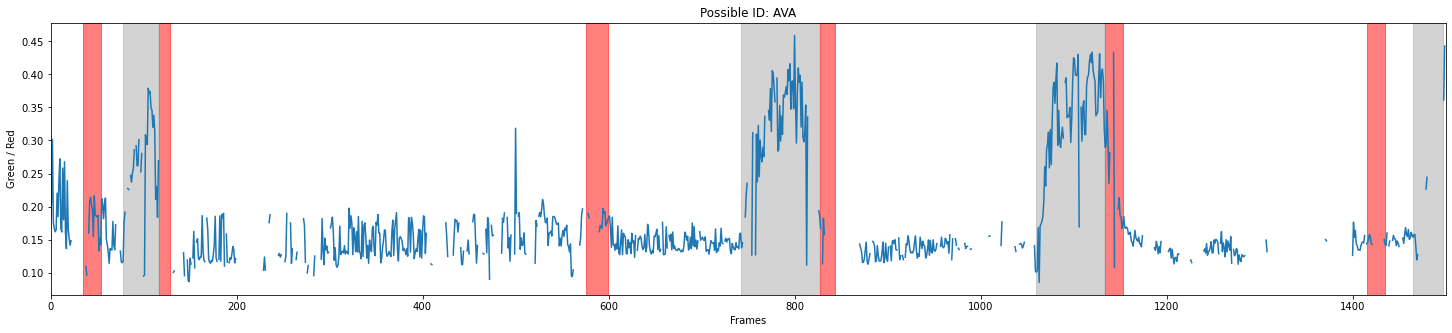

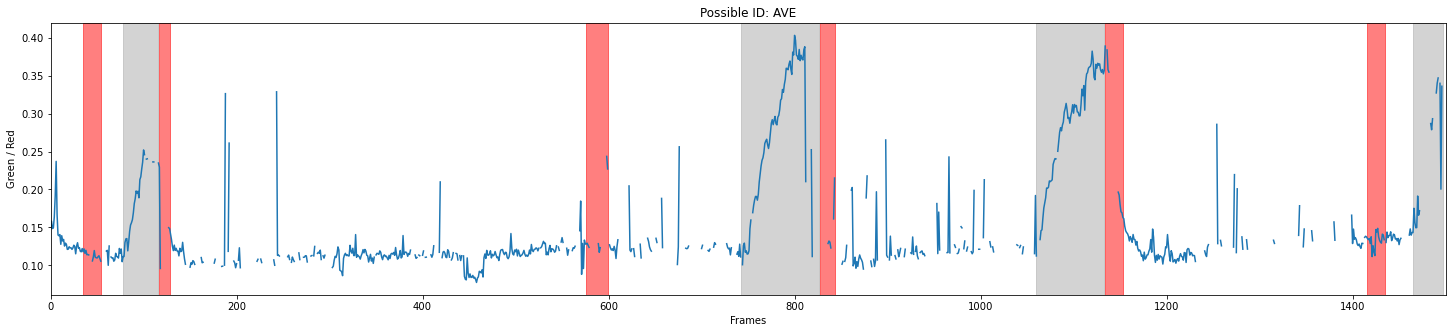

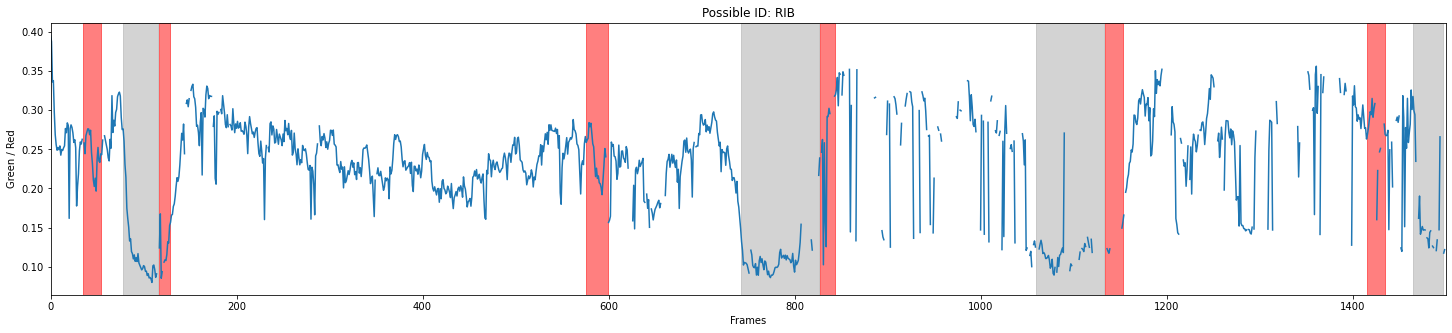

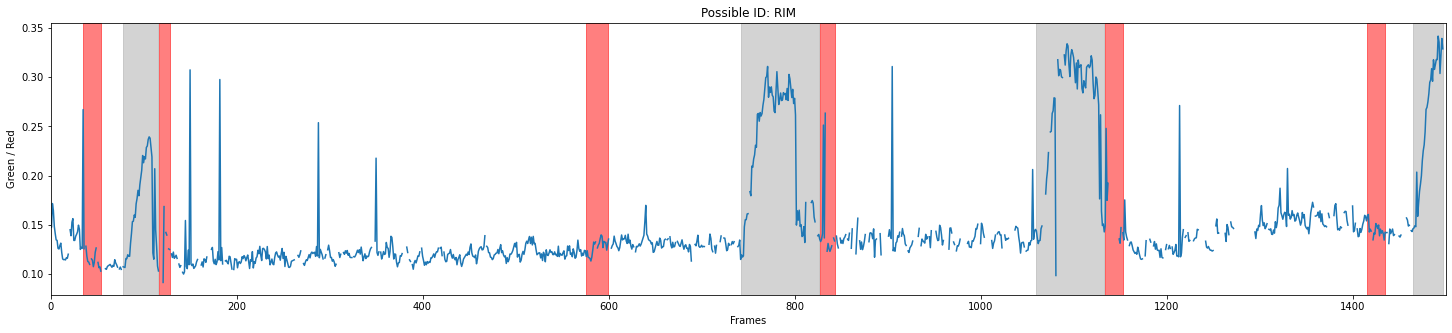

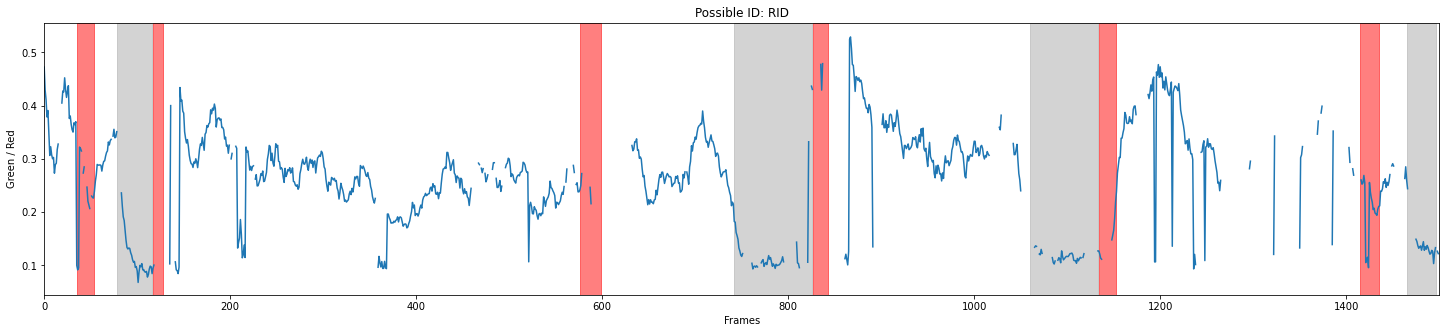

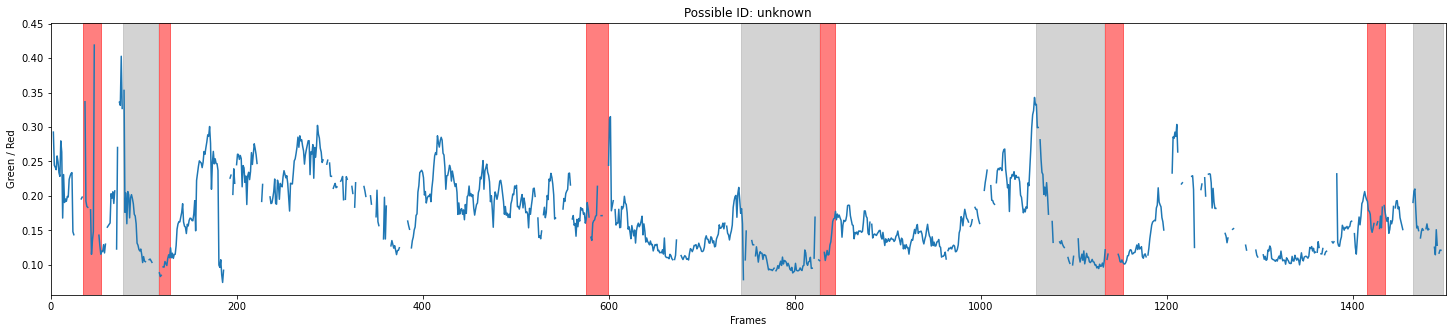

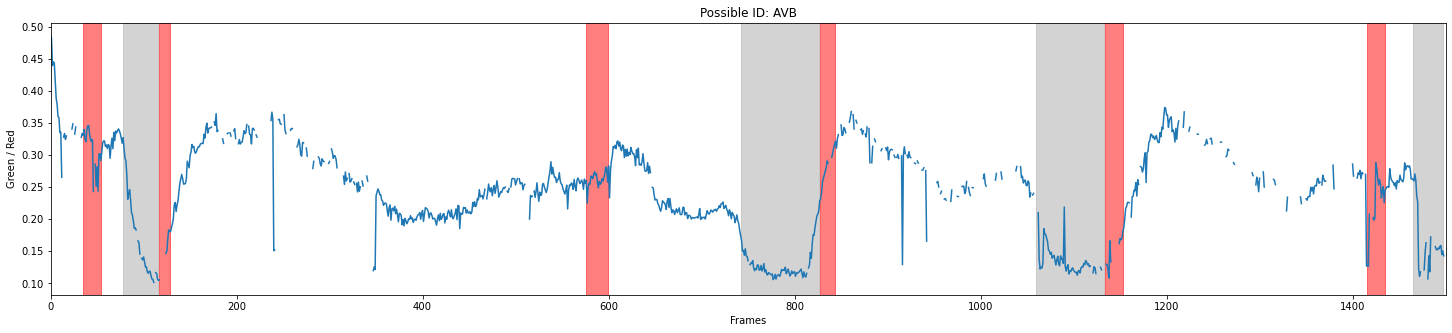

In [3]:
name_guesses = {'neuron35': 'AVA',
               'neuron33': 'AVE',
               'neuron5': 'RIB',
               'neuron3': 'RIM',
               'neuron40': 'RID',
               'neuron67': 'unknown',
               'neuron66': 'AVB'}

%matplotlib inline
for k, v in name_guesses.items():
    y = dat.calculate_traces('ratio', 'integration', k)
    plt.figure(figsize=(25,5))
    plt.plot(y)
    plt.xlim([0, 1500])
    plt.xlabel('Frames')
    plt.ylabel('Green / Red')
    plt.title(f"Possible ID: {v}")
    dat.shade_axis_using_behavior(plt.gca())
    
    out_fname = f"{v}_ratio.png"
#     plt.savefig(out_fname)

# Filtered traces

In [42]:
name_guesses = {'neuron35': 'AVA',
               'neuron33': 'AVE',
               'neuron5': 'RIB',
               'neuron3': 'RIM',
               'neuron40': 'RID',
               'neuron67': 'unknown',
               'neuron66': 'AVB',
               'neuron63': 'unknown_bleaching',
               'neuron43': 'unknown_oscillating'}

# Outlier parameters
thresh = 0.1

%matplotlib widget
for k, v in name_guesses.items():
    y = dat.calculate_traces('ratio', 'integration', k)
    plt.figure(figsize=(25,5))
#     plt.plot(y, label='Raw signal')
    plt.xlabel('Frames')
    plt.xlim([0, 1500])
    plt.ylabel('Green / Red')
    plt.title(f"Possible ID: {v}")
    dat.shade_axis_using_behavior(plt.gca(), behaviors_to_ignore=[2])
    
    # Remove outliers via simple error calculation
    y_filt = y.rolling(10, min_periods=1).mean()
    error = np.abs(y - y_filt)
    is_outlier = error > thresh
    y[is_outlier] = np.nan
    
#     y_filt = y.rolling(3, min_periods=1).mean()
#     plt.plot(y_filt, label='Weakly filtered signal')
    
    y_filt = y.rolling(7, min_periods=3).mean()
    plt.plot(y_filt, label='Strongly filtered signal')
    
#     plt.legend()
    
    out_fname = f"{v}_filtered_only_ratio.png"
#     out_fname = f"{v}_filtered_and_raw_ratio.png"
    plt.savefig(out_fname)

Calculating ratio trace for neuron35 for integration mode


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Calculating ratio trace for neuron33 for integration mode


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Calculating ratio trace for neuron5 for integration mode


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Calculating ratio trace for neuron3 for integration mode


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Calculating ratio trace for neuron40 for integration mode


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Calculating ratio trace for neuron67 for integration mode


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Calculating ratio trace for neuron66 for integration mode


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Calculating ratio trace for neuron63 for integration mode


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Calculating ratio trace for neuron43 for integration mode


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Do bicubic or linear instead of just rolling mean

In [1]:
# name_guesses = {'neuron35': 'AVA',
#                'neuron33': 'AVE',
#                'neuron5': 'RIB',
#                'neuron3': 'RIM',
#                'neuron40': 'RID',
#                'neuron67': 'unknown',
#                'neuron66': 'AVB',
#                'neuron63': 'unknown_bleaching',
#                'neuron43': 'unknown_oscillating'}
name_guesses = {'neuron35': 'AVA',
               'neuron33': 'AVE',
               'neuron3': 'RIM',
               'neuron43': '43',
               'neuron5': 'RIB',
               'neuron40': 'RID',
               'neuron67': '67',
               'neuron66': 'AVB',
               'neuron63': '63'}

# Outlier parameters
thresh = 0.03
to_plot_raw = True
to_save = False

fps = 1
tspan = np.arange(1500) / fps
xlim = [0, tspan[-1]]

%matplotlib widget
# plt.figure(figsize=(25,5))

num_subplots = len(name_guesses)
cmap = plt.get_cmap('tab10', num_subplots)
fig, axes = plt.subplots(num_subplots, 1, figsize=(15,20))

for i, (k, v) in enumerate(name_guesses.items()):
    plt.sca(axes[i])
    
    y = dat.calculate_traces('ratio', 'integration', k)
    if to_plot_raw:
        plt.plot(tspan, y, '.', lw=3, label='Raw signal')
    dat.shade_axis_using_behavior(plt.gca(), behaviors_to_ignore=[2])
    
    # Remove outliers via simple error calculation
    y_filt = y.rolling(13, min_periods=1).mean()
    error = np.abs(y - y_filt)
    is_outlier = error > thresh
    y[is_outlier] = np.nan
    
    # Main plotting
    y_filt = y.interpolate(method='linear', limit=15, limit_direction='both')
    y_filt = y_filt.rolling(7, min_periods=1).mean()
    plt.plot(tspan, y_filt, label=f"{v}", c=cmap.colors[i, :])
    
    # Clean up axes
#     plt.axis('off')
    ax = axes[i]
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.patch.set_alpha(0.0)
    plt.xlim(xlim)
    if i < (len(name_guesses)-1):
        plt.xticks([])
        ax.spines['bottom'].set_visible(False)
    plt.ylabel('Green / Red')
    
    plt.legend()
    
#     out_fname = f"{v}_linear_and_movmean_ratio.eps"
#     plt.savefig(out_fname)
fig.subplots_adjust(hspace=0.0)
plt.xlabel('Time (frames)')

if to_save:
    out_fname = f"combined_linear_and_movmean_ratio.eps"
    plt.savefig(out_fname, format='eps', transparent=True)

#     out_fname = f"combined_linear_and_movmean_ratio.svg"
#     plt.savefig(out_fname, format='svg')

NameError: name 'np' is not defined

# Same filtering as above, but all on one axis

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

Calculating ratio trace for neuron35 for integration mode
Calculating ratio trace for neuron33 for integration mode
Calculating ratio trace for neuron3 for integration mode
Calculating ratio trace for neuron43 for integration mode
Calculating ratio trace for neuron5 for integration mode
Calculating ratio trace for neuron40 for integration mode
Calculating ratio trace for neuron63 for integration mode
Calculating ratio trace for neuron66 for integration mode
Calculating ratio trace for neuron67 for integration mode


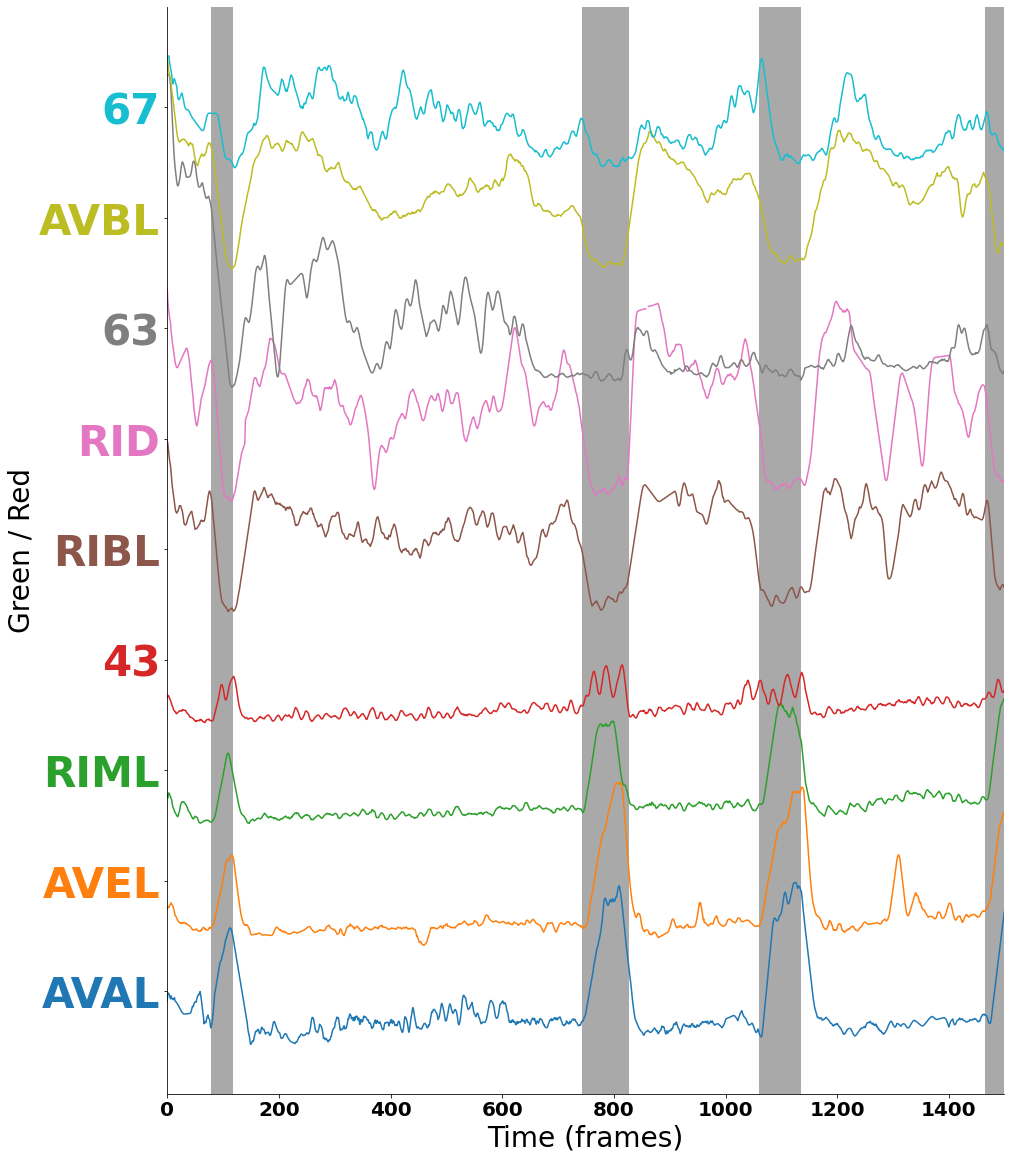

In [26]:
name_guesses = {'neuron35': 'AVAL',
               'neuron33': 'AVEL',
               'neuron3': 'RIML',
               'neuron43': '43',
               'neuron5': 'RIBL',
               'neuron40': 'RID',
               'neuron63': '63',
               'neuron66': 'AVBL',
               'neuron67': '67'}


plt.rc('ytick', labelsize=42)
plt.rc('xtick', labelsize=20)
plt.rc('axes', labelsize=28)
# font = {'font.size'   : 42}
# plt.rcParams.update(font)

# Outlier parameters
thresh = 0.03
to_plot_raw = False
to_save = True

fps = 1
tspan = np.arange(1500) / fps
xlim = [0, tspan[-1]]

y_offset_scale = 0.2

# Custom time point to highlight
t = 1118
to_plot_vline = False


%matplotlib inline
num_subplots = len(name_guesses)
cmap = plt.get_cmap('tab10', num_subplots)
plt.figure(figsize=(15,20))

for i, (k, v) in enumerate(name_guesses.items()):    
    y = dat.calculate_traces('ratio', 'integration', k)
    y_offset = y_offset_scale*i
    
    if to_plot_raw:
        plt.plot(tspan, y + y_offset, 'k', lw=3, label='Raw signal')
    dat.shade_axis_using_behavior(plt.gca(), behaviors_to_ignore=[2])
    
    # Remove outliers via simple error calculation
    y_filt = y.rolling(13, min_periods=1).mean()
    error = np.abs(y - y_filt)
    is_outlier = error > thresh
    y[is_outlier] = np.nan
    
    # Main plotting
    y_filt = y.interpolate(method='linear', limit=15, limit_direction='both')
    y_filt = y_filt.rolling(7, min_periods=1).mean()
    
    plt.plot(tspan, y_filt + y_offset, label=f"{v}", c=cmap.colors[i, :])
    
    # Clean up axes
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.patch.set_alpha(0.0)
    plt.xlim(xlim)
    plt.ylabel('Green / Red')
    
#     plt.legend()
    
plt.xlabel('Time (frames)')

# Add vertical line to show MIP time point
if to_plot_vline:
    vline_opt = ([t, t], [0, 2.0], 'k')
    plt.plot(*vline_opt)
    
ax = plt.gca()
ax.set_yticks(np.arange(num_subplots)*y_offset_scale + y_offset_scale)
ax.set_yticklabels([v for v in name_guesses.values()])
[t.set_color(cmap.colors[i, :]) for i, t in enumerate(ax.yaxis.get_ticklabels())]


if to_save:
    out_fname = f"combined_linear_and_movmean_ratio_unified.eps"
    plt.savefig(out_fname, format='eps', transparent=True)
    out_fname = f"combined_linear_and_movmean_ratio_unified.png"
    plt.savefig(out_fname, format='png', transparent=False)

#     out_fname = f"combined_linear_and_movmean_ratio.svg"
#     plt.savefig(out_fname, format='svg')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


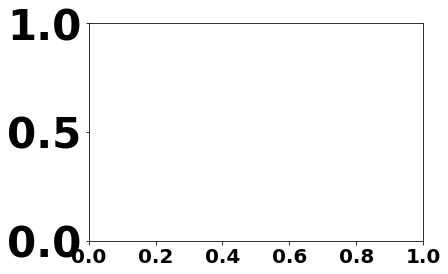

In [22]:
x = plt.xlabel("")

In [24]:
dir(x)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_axes',
 '_bbox_patch',
 '_cached',
 '_callbacks',
 '_clipon',
 '_clippath',
 '_color',
 '_contains',
 '_default_contains',
 '_fontproperties',
 '_get_clipping_extent_bbox',
 '_get_dist_to_box',
 '_get_layout',
 '_get_multialignment',
 '_get_rendered_text_width',
 '_get_wrap_line_width',
 '_get_wrapped_text',
 '_get_xy_display',
 '_gid',
 '_horizontalalignment',
 '_in_layout',
 '_label',
 '_linespacing',
 '_mouseover',
 '_multialignment',
 '_path_effects',
 '_picker',
 '_preprocess_math',
 '_rasterized',
 '_remove_method',
 '_renderer',
 '_rotation'

# Filtered Red

In [7]:
name_guesses = {'neuron35': 'AVA',
               'neuron33': 'AVE',
               'neuron5': 'RIB',
               'neuron3': 'RIM',
               'neuron40': 'RID',
               'neuron67': 'unknown',
               'neuron66': 'AVB',
               'neuron63': 'unknown_bleaching',
               'neuron43': 'unknown_oscillating'}

# Outlier parameters
thresh = 10000

%matplotlib widget
for k, v in name_guesses.items():
    y = dat.calculate_traces('red', 'integration', k)
    plt.figure(figsize=(25,5))
    plt.plot(y, label='Raw signal')
    plt.xlabel('Frames')
    plt.xlim([0, 1500])
    plt.ylabel('Red')
    plt.title(f"Possible ID: {v}")
    dat.shade_axis_using_behavior(plt.gca(), behaviors_to_ignore=[2])
    
    # Remove outliers via simple error calculation
    y_filt = y.rolling(10, min_periods=1).mean()
    error = np.abs(y - y_filt)
    is_outlier = error > thresh
    y[is_outlier] = np.nan
    
    y_filt = y.rolling(7, min_periods=3).mean()
    plt.plot(y_filt, label='Strongly filtered signal')
    
    plt.legend()
    
#     break
    out_fname = f"{v}_filtered_and_raw_red.png"
#     plt.savefig(out_fname)

Calculating red trace for neuron35 for integration mode


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Calculating red trace for neuron33 for integration mode


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Calculating red trace for neuron5 for integration mode


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Calculating red trace for neuron3 for integration mode


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Calculating red trace for neuron40 for integration mode


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Calculating red trace for neuron67 for integration mode


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Calculating red trace for neuron66 for integration mode


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Calculating red trace for neuron63 for integration mode


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Calculating red trace for neuron43 for integration mode


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [20]:
%matplotlib widget

error = np.abs(y - y_filt)
thresh = 0.1
is_outlier = error > thresh
plt.plot(is_outlier)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
y[is_outlier] = np.nan

# MIP with numbered neurons


In [8]:
from DLC_for_WBFM.utils.visualization.napari_from_config import create_text_labels_for_napari
import napari
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# options = create_text_labels_for_napari(dat.red_traces)

In [10]:
# viewer = napari.view_image(dat.red_data)
# viewer.add_points(**options)

In [11]:
# Instead of just numbers, some names
name_guesses = {'neuron35': 'AVAL',
               'neuron33': 'AVEL',
               'neuron5': 'RIBL',
               'neuron3': 'RIML',
               'neuron40': 'RID',
               'neuron67': '67',
               'neuron66': 'AVBL',
               'neuron63': '63',
               'neuron43': '43'}

all_neurons = list(dat.red_traces.columns.levels[0])
for n in all_neurons:
    if n not in name_guesses:
        name_guesses[n] = ''

options = create_text_labels_for_napari(dat.red_traces, name_guesses)

In [7]:
viewer = napari.view_image(dat.red_data)
viewer.add_points(**options)

<Points layer 'Neuron IDs' at 0x15139e3cfc8>

Unable to load numpy_formathandler accelerator from OpenGL_accelerate


In [13]:
viewer = napari.view_image(dat.red_data[537, 2:,...])
